### ЛР&nbsp;№3&nbsp;&nbsp;&nbsp;&nbsp;Вариант&nbsp;14
---

In [603]:
from Plot import *
from collections import Counter
import pandas as pd

#### Задание&nbsp;1.&nbsp;&nbsp;Критерий&nbsp;Пирсона
---

In [604]:
variation_series = get_empirical_points(200)

In [605]:
equal_chance_data = get_equal_chance_data(variation_series)
plot_equal_interval = Plot('y', 'f*(y)', equal_chance_data)

In [606]:
A, B = equal_chance_data[L_BORDER], equal_chance_data[R_BORDER]
pd.DataFrame({
    '$A_i$': A,
    '$B_i$': B,
    '$step_i$': [B[i] - A[i] for i in range(len(A))],
    '$amount_i$': len(variation_series) // get_intervals_amount(len(variation_series)),
    '$f*_i$': equal_chance_data[F_DENSITY]
})

,$A_i$,$B_i$,$step_i$,$amount_i$,$f*_i$
0,0.0030,0.0970,0.0940,22,1.170213
1,0.0970,0.1795,0.0825,22,1.333333
2,0.1795,0.2725,0.0930,22,1.182796
3,0.2725,0.3965,0.1240,22,0.887097
4,0.3965,0.4945,0.0980,22,1.122449
5,0.4945,0.5755,0.0810,22,1.358025
6,0.5755,0.6965,0.1210,22,0.909091
7,0.6965,0.8820,0.1855,22,0.592992
8,0.8820,0.9840,0.1020,22,1.078431


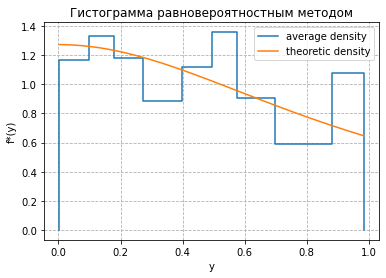

In [607]:
plot_equal_interval.density_hist()
theoretic_density(variation_series)
plot_equal_interval.show('Гистограмма равновероятностным методом')

Выдвенем гипотезу $H_0$, что наше эмпирическое и теоретическое распределения совпадают

формула вероятности попадания случайной велечины в <em>iй интервал при условии , что гипотеза верна

$$p_i=\frac{4}{\pi} \cdot (arctg(B_i)-arctg(A_i))$$

In [608]:
F_A, F_B, p_theoretic, xi_list = [], [], [], []
series_len = len(variation_series)
intervals_amount = get_intervals_amount(series_len)
p = v = series_len // intervals_amount / series_len

F = lambda y: 4 / np.pi * np.arctan(y)
for i in range(len(equal_chance_data[L_BORDER])):
    F_A.append(F(equal_chance_data[L_BORDER][i]))
    F_B.append(F(equal_chance_data[R_BORDER][i]))
    p_theoretic.append(F_B[-1] - F_A[-1])
    xi_list.append(series_len * (p_theoretic[-1] - p) ** 2 / p_theoretic[-1])

In [609]:
pd.DataFrame({
    '$F(A_i)$': equal_chance_data[L_BORDER],
    '$F(B_i)$': equal_chance_data[R_BORDER],
    '$p_i$': p_theoretic,
    '$p_i^*$': p,
    '$\chi_i$': xi_list
})

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,0.0030,0.0970,0.119299,0.11,0.144976
1,0.0970,0.1795,0.103019,0.11,0.094606
2,0.1795,0.2725,0.112595,0.11,0.011962
3,0.2725,0.3965,0.141896,0.11,1.433959
4,0.3965,0.4945,0.104090,0.11,0.067101
5,0.4945,0.5755,0.080178,0.11,2.218360
6,0.5755,0.6965,0.109706,0.11,0.000157
7,0.6965,0.8820,0.145668,0.11,1.746763
8,0.8820,0.9840,0.069459,0.11,4.732507


In [610]:
print('xi^2 = {}'.format(sum(xi_list)))

xi^2 = 10.450390401351655


'Количество степеней свободы равно:
$$k=M-1=9-1=8$$


Из "Хи - квадрат" таблицы выберем значение $\chi_{a,b}^2$,
где $\alpha=0.01$:
$$\chi_{\alpha,k}^2=20.10$$

$\chi^2 < \chi_{\alpha,k}^2$, следовательно, нет оснований отклонять выдвинутую гипотезу.

#### Задание 2.&nbsp;&nbsp;Критерий&nbsp;Колмогорова
---

In [611]:
variation_series = get_empirical_points(30)
empiric_data = dict(Counter(variation_series))
count = 0
for k, v in empiric_data.items():
    count += v
    empiric_data[k] = count / len(variation_series)

In [612]:
def f_y(i):
    return round((4 / np.pi) * np.arctan(i), 3)

y, f = zip(*{**{0: 0}, **empiric_data, **{1: 1}}.items())
empiric_y = list(y)
empiric_f = list(f)
theoretic_f = [f_y(i) for i in empiric_y]

In [613]:
f_difference = [abs(empiric_f[i] - theoretic_f[i]) for i in range(len(empiric_f))]
mx = max(f_difference)
index = f_difference.index(mx)

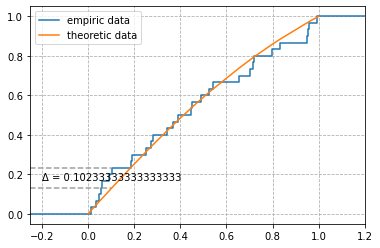

Максимальная разность по модулю между теоретической и эмпирической функцией равна 0.10233333333333333 при y=0.103


In [614]:
plt.grid(True, which='both', linestyle='--')
plt.xlim(-0.25, 1.2)
plt.step([-0.25] + empiric_y + [1.2], [0] + empiric_f + [1], where='post', label='empiric data')
plt.plot(y, theoretic_f, label='theoretic data')

x = np.arange(-0.25, empiric_y[index], 0.01)
plt.plot(x, [empiric_f[index]] * len(x), '--', color='#9E9E9E')
plt.plot(x, [theoretic_f[index]] * len(x), '--', color='#9E9E9E')
text_x = -0.2
text_y = theoretic_f[index] if theoretic_f[index] < empiric_f[index] else empiric_f[index]
plt.annotate('Δ = {}'.format(mx), (text_x, text_y + mx / 2 - 0.01))

plt.legend()
plt.show()
print('Максимальная разность по модулю между теоретической и эмпирической функцией равна'
      ' {} при y={}'.format(mx, empiric_y[index]))

Вычислим значение статистики $\lambda$:

$$\lambda=\sqrt{n} \cdot max|F^*(x) - F_0(x)|$$

In [615]:
print('λ = {}'.format(np.sqrt(len(variation_series)) * mx))

λ = 0.56050275051362


Из таблицы Колмогорова выберем критическое значение, при условии что доверительная вероятность $\gamma=1-\alpha=0.95$:

$$\lambda_x=1.38$$

Поскольку $\lambda<\lambda;_x$ у нас нет оснований отклонять выдвинутую гипотезу


#### Задание 3.&nbsp;&nbsp;Критерий&nbsp;Мизеса
---

In [616]:
series_len = 50
variation_series = get_empirical_points(series_len)
F_empiric = []
F_theoretic = []
deviation = []

In [617]:
for i in range(series_len):
    F_empiric.append((i + 0.5) / series_len)
    F_theoretic.append(f_y(variation_series[i]))
    deviation.append((F_empiric[-1] - F_theoretic[-1]) ** 2)


In [618]:
pd.DataFrame({
    '$y_i$': variation_series,
    '$F*(y_i)$': F_empiric,
    '$F(y_i)$': F_theoretic,
    '$D_i$': deviation
})

,$y_i$,$F*(y_i)$,$F(y_i)$,$D_i$
0,0.002,0.01,0.003,0.000049
1,0.049,0.03,0.062,0.001024
2,0.069,0.05,0.088,0.001444
3,0.086,0.07,0.109,0.001521
4,0.087,0.09,0.110,0.000400
5,0.103,0.11,0.131,0.000441
6,0.104,0.13,0.132,0.000004
7,0.124,0.15,0.157,0.000049
8,0.152,0.17,0.192,0.000484
9,0.152,0.19,0.192,0.000004


Критическое значение статистики Мизеса 0.461 (при уровне значимости $\alpha=0.05$).
Фактическое значение статистики:

In [619]:
print(1 / (12 * series_len) + sum(deviation))

0.03703166666666666


что меньше критического значения. Следовательно, гипотеза $H_0$ не противоречит имеющимся данным